# Generating core data visualizations on the Central Park weather dataset in Python

## Introduction

We learned four key plot types in the lecture on Data Visualization: **timeseries**, **box-and-whisker**, **histogram**, and **scatterplot**.  This included both what they represent/how to interpret them *and* how to plot them in a Jupyter notebook using matplotlib and numpy.  We also learned how to read in netCDF files from disk---such as the Central Park weather station dataset---using the `netCDF4` package.

In this assignment, you'll generate these plots for all of the variables in that dataset.

## A toy example

To provide concrete examples of what you'll create, first I'll create a fake dataset that's the same length as the Central Park data.  

(This involves things that we haven't yet covered in class, so it's no problem if you don't follow the lines of code below.)

In [2]:
import numpy as np
import xarray as xr

# Load the Central Park dataset from disk.
# Note: on my computer, the filepath below is the correct one.  But it probably won't be on yours!  Replace it as needed.
filepath_in = "../data/central-park-station-data.nc"
ds_central_park = xr.open_dataset(filepath_in)

# Draw randomly from a Gaussian distribution.
mean = 0.
std_dev = 1.
vals_toy = np.random.normal(mean, std_dev, len(ds_central_park["temp_avg"]))

# Make this toy data into an xarray.DataArray with the coordinates from the Central Park data
arr_toy = vals_toy * xr.ones_like(ds_central_park["temp_avg"]).rename("toy")
arr_toy

<xarray.DataArray 'toy' (time: 56520)>
array([ 0.5578879 , -0.94870388,  1.1711084 , ..., -1.32257595,
        0.98705103,  1.07318723])
Coordinates:
  * time     (time) datetime64[ns] 1869-01-01 1869-01-02 ... 2023-09-30

Now, create the plots:

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
from matplotlib import pyplot as plt

Text(0, 0.5, 'count [unitless]')

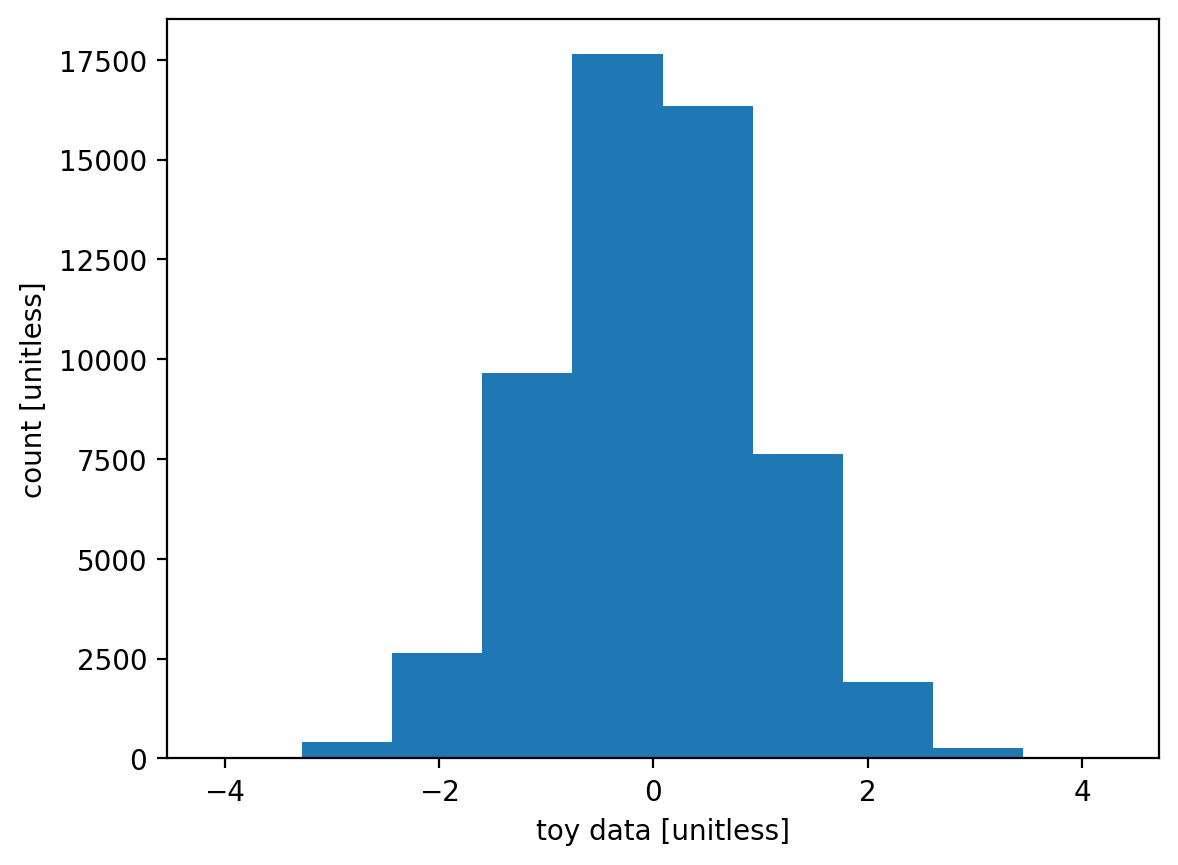

In [4]:
fig = plt.figure()  # create a matplotlib.Figure instance
ax = fig.add_subplot()  # add a matplotlib.Axes instance to fig

ax.hist(arr_toy)  # you could also call plt.hist
ax.set_xlabel("toy data [unitless]")
ax.set_ylabel("count [unitless]")

Text(0, 0.5, 'toy data [unitless]')

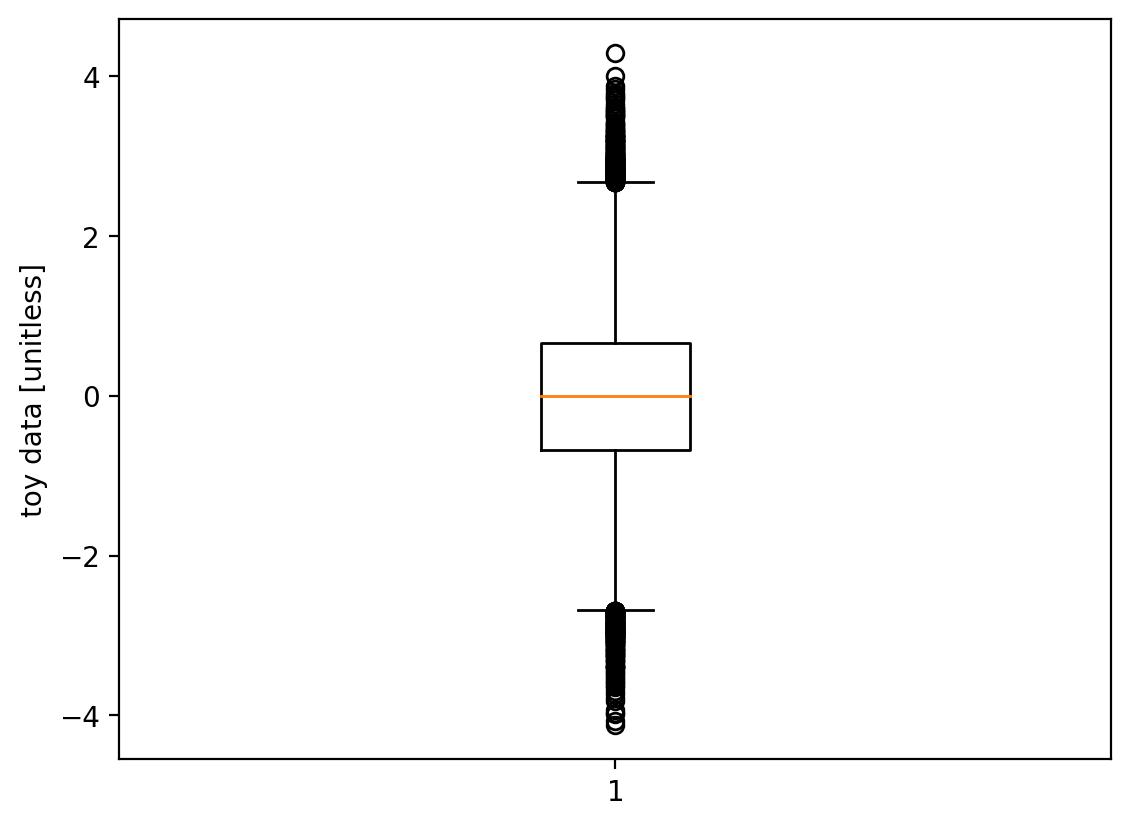

In [5]:
fig, ax = plt.subplots()  # This one-liner is more convenient than the two lines version above.
ax.boxplot(arr_toy)
ax.set_ylabel("toy data [unitless]")

Text(0, 0.5, 'toy data [unitless]')

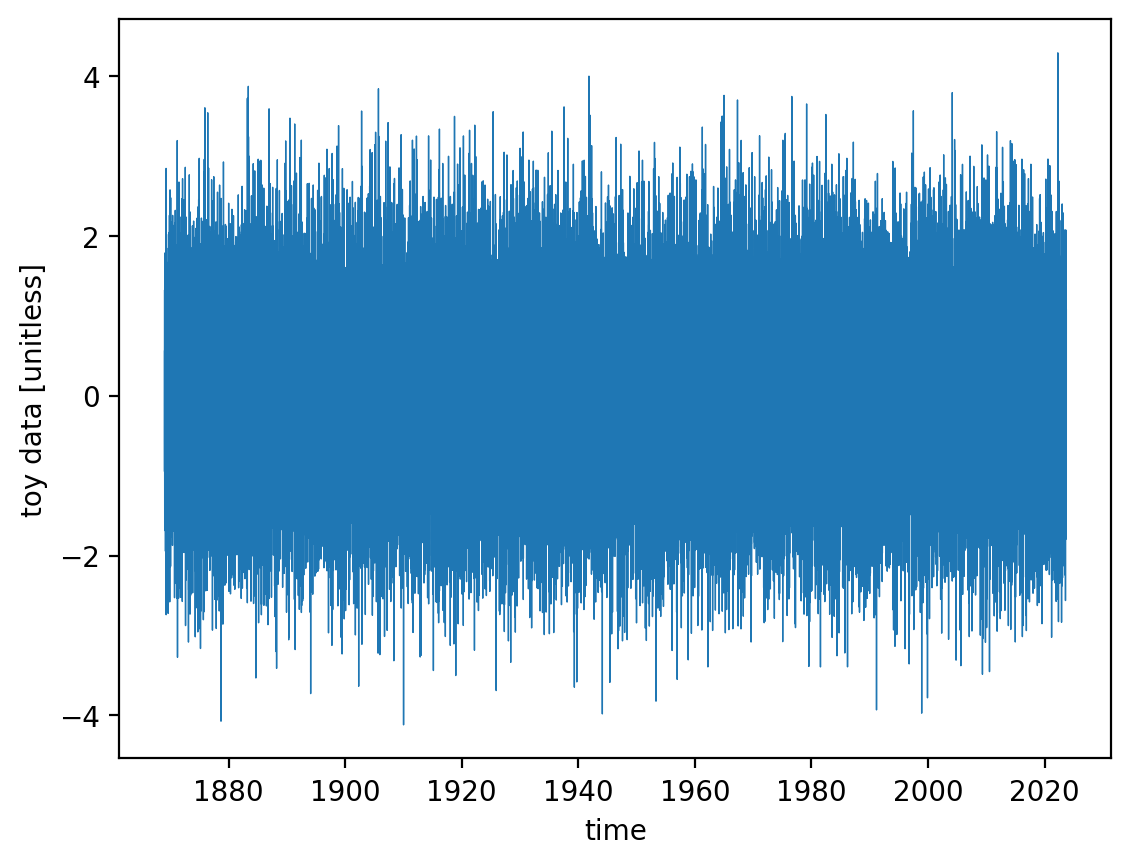

In [6]:
fig, ax = plt.subplots()  # This one-liner is more convenient than the two lines version above.
ax.plot(arr_toy["time"], arr_toy, linewidth=0.5)
ax.set_xlabel("time")
ax.set_ylabel("toy data [unitless]")

There you go.  (We'll return to scatterplots further below.)

You can also put all three together into a single figure:

Text(0.5, 0.98, 'Histogram, box-and-whisker, and timeseries plots of the toy array')

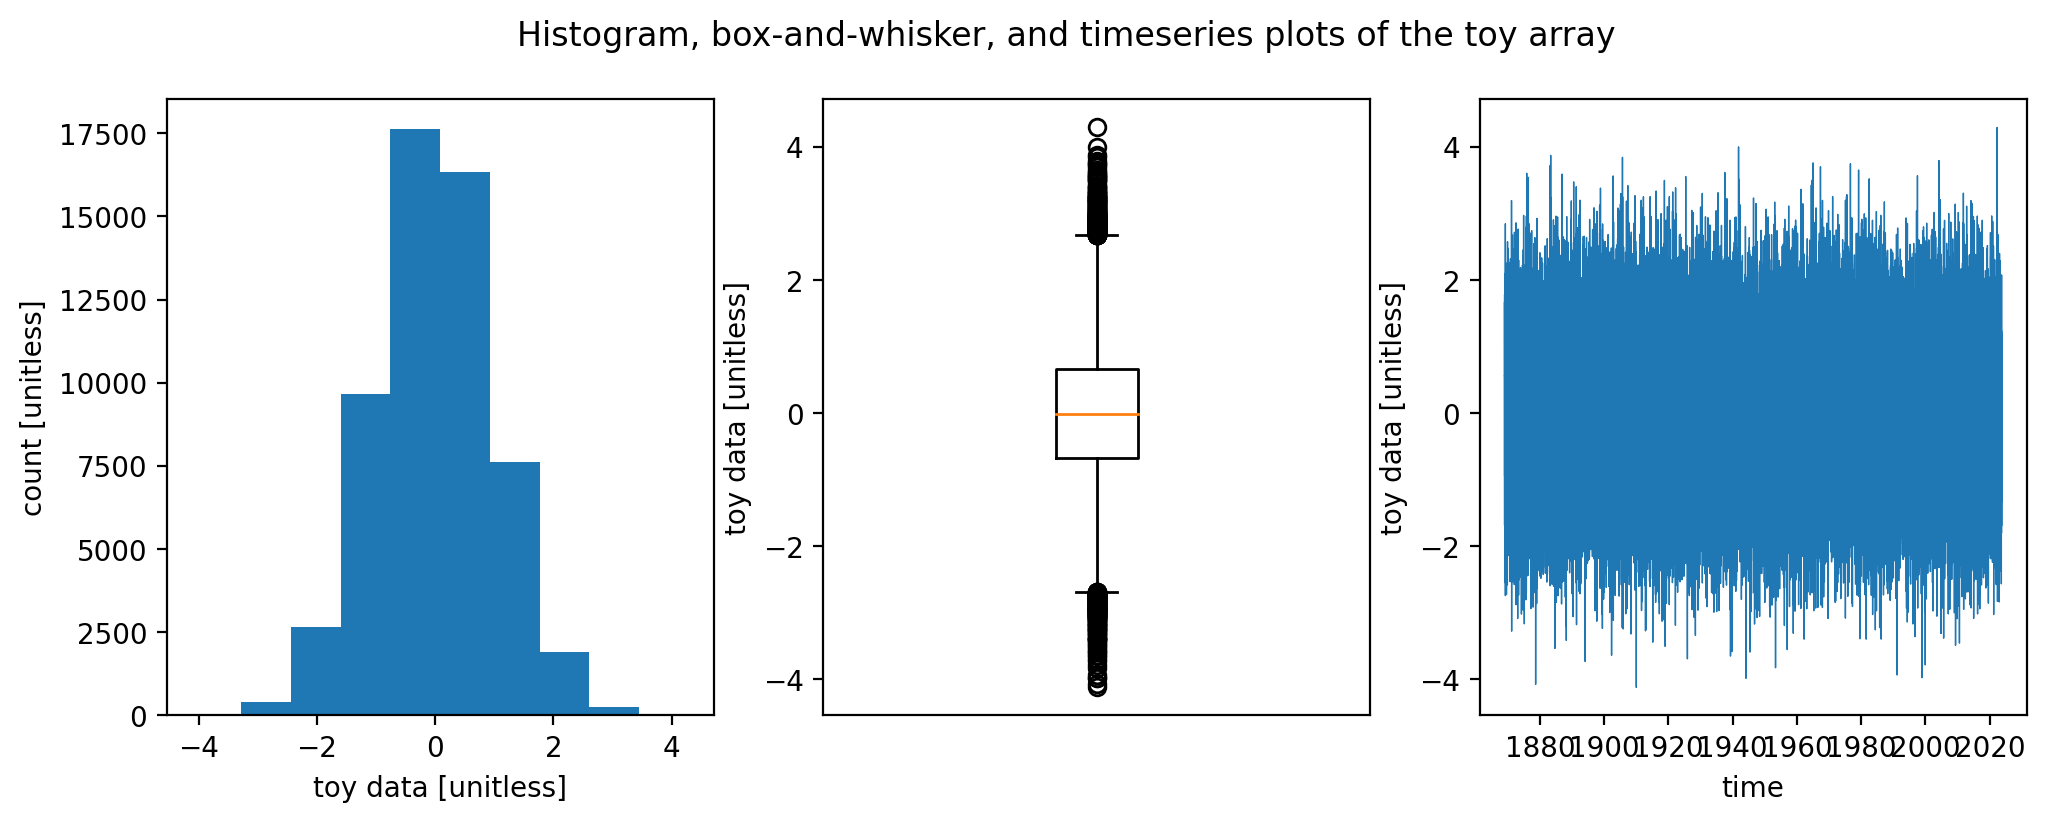

In [7]:
fig, axarr = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))  # create a figure containting 1x3 array of axes

ax = axarr[0]
ax.hist(arr_toy)  # you could also call plt.hist
ax.set_xlabel("toy data [unitless]")
ax.set_ylabel("count [unitless]")

ax = axarr[1]
ax.boxplot(arr_toy)
ax.set_xticks([])
ax.set_ylabel("toy data [unitless]")

ax = axarr[2]
ax.plot(arr_toy["time"], arr_toy, linewidth=0.5)
ax.set_xlabel("time")
ax.set_ylabel("toy data [unitless]")

fig.suptitle("Histogram, box-and-whisker, and timeseries plots of the toy array")

### If you're using the `netCDF4` package

Above, I'm using the `xarray` package to load in the dataset.  We haven't discussed `xarray` yet in class, but if you're comfortable using it then you're welcome to.

We *did* cover the `netCDF4` package however, so no matter what you should be able to load the netCDF file from disk into your notebook.

However the one complication if you use `netCDF4` is dealing with the times.  For reasons we'll get into later, how dates and times get "encoded" when they're written to disk and then "decoded" when they're read from disk is actually much more complicated than you might think.  While xarray automatically handles this very nicely,  `netCDF4` does not.  

So when you go to do the timeseries plots, you'll see that the `time` array is really just the indices of time: 0, 1, 2, ..., 56425, and last 56427 (notice the labeled values along the x-axis):

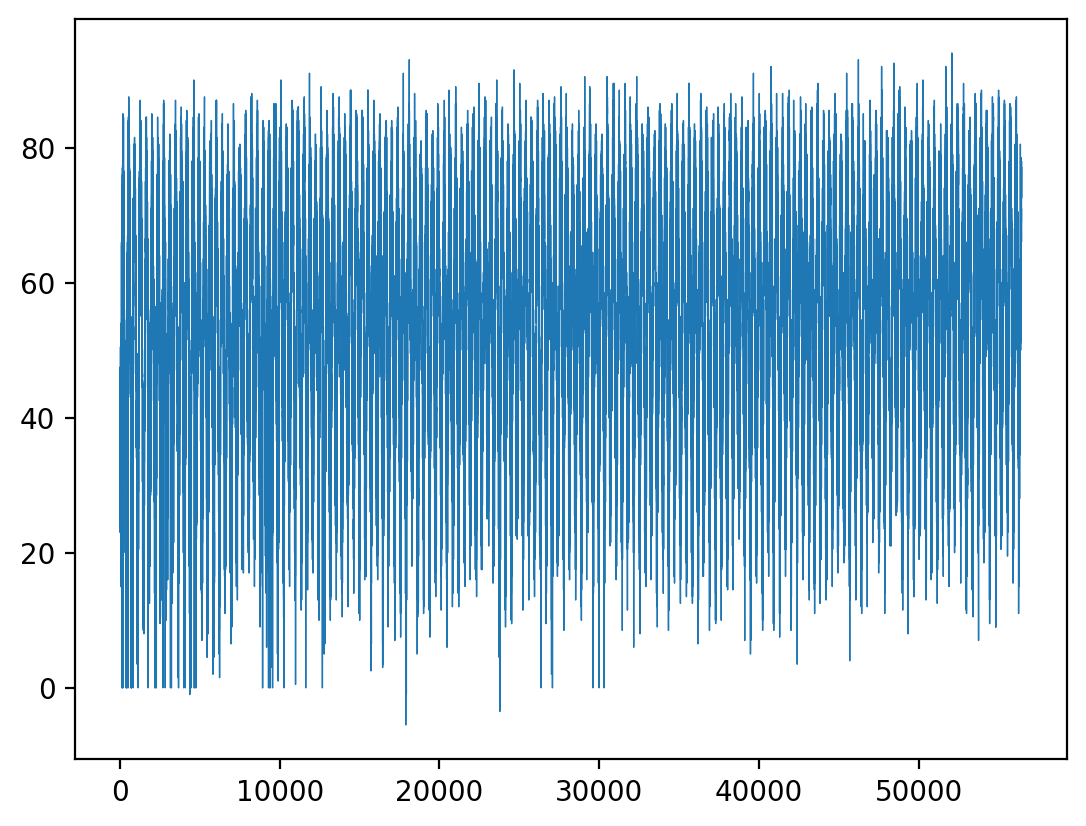

In [7]:
# Load the file from disk if you haven't already.
import netCDF4
ds_nc4  = netCDF4.Dataset("../data/central-park-station-data.nc", "r")

plt.plot(ds_nc4["time"][:], ds_nc4["temp_avg"][:], linewidth=0.5)

We don't want that; we want the actual dates.  So if you're using `netCDF4`, in order to get the array of dates, you can use the following lines of code (note that the `cftime` package is automatically installed when `netCDF4` is, so you should have it; but worst case do `pip install cftime`):

In [8]:
# Decode the times into an array of dates using the `num2date` function of the `cftime` package.
import cftime
times_encoded = ds_nc4["time"]
dates = cftime.num2date(
    times_encoded[:], 
    times_encoded.units, 
    times_encoded.calendar, 
    only_use_cftime_datetimes=False, 
    only_use_python_datetimes=True,
)

Then for your timeseries plots you can do e.g. (again, notice the labeled values along the x axis):

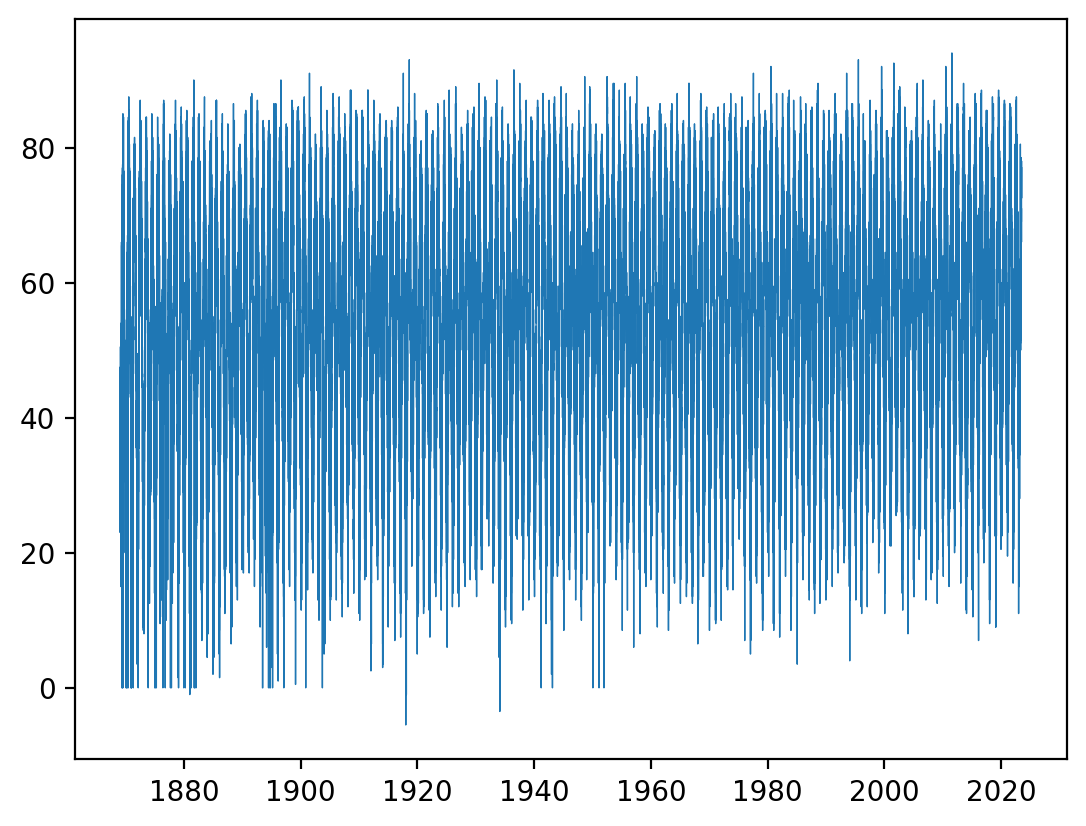

In [9]:
plt.plot(dates, ds_nc4["temp_avg"][:], linewidth=0.5)

## Your specific tasks

### Histogram, box-and-whisker, and timeseries for the Central Park weather station variables

For **each** of the following variables in the Central Park daily weather dataset...
- `temp_avg` (daily average temperature)
- `temp_min` (daily minimum temperature)
- `temp_max` (daily maximum temperature)
- `temp_anom` (daily average temperature *departure* from "normal", i.e. a 30-year average)
- `heat_deg_days` ([heating degree days](https://en.wikipedia.org/wiki/Heating_degree_day))
- `cool_deg_days` ([cooling degree days](https://en.wikipedia.org/wiki/Degree_day#United_States))
- `precip` (precipitation in inches; when it's snow this is [*snow water equivalent*](https://en.wikipedia.org/wiki/Snow_science#Measurement))
- `snow_fall` (snowfall in inches that day)
- `snow_depth` (depth in inches of snow currently on the ground)

...complete **all** of the following tasks:

- [ ] Create a 1x3 figure (meaning 1 row by 3 columns) just like the one above generated on my toy array.
- [ ] Be sure to properly label the x and y axes in each case: identify the physical quantity and the units.
- [ ] As a text ("markdown") cell above the figure, include a 1 or 2 sentence description of what the quantity is.
- [ ] As a Markdown cell below the figure, for each of the 3 plots, include a 1 or 2 sentence description: the overall behavior and anything else that seems noteworthy.

### Make selected scatterplots

For **each** of the following pairs of fields:

- `temp_min` vs. `temp_max`
- `temp_avg` vs. `cool_deg_days`
- `snow_fall` vs. `precip`
- `temp_avg` vs. `temp_avg` 2 weeks later
- `temp_anom` vs. `temp_anom` 2 weeks later

...do the following:
- [ ] generate a scatterplot
- [ ] Include a markdown cell immediately after with 1-2 sentences describing the overall behavior and anything else noteworthy you see.  

## How to submit

### Submission URLs

Use the Google Form link in the "Links for homework submissions" document on the course Blackboard site to submit.  It's the one labeled "HW2".  (You must be logged into your CUNY citymail account in Google to be granted access to the submission form.)

Submit the notebook as a *single* `.ipynb` file with a filename matching **exactly** the pattern `eas42000_hw1_lastname-firstname.ipynb`, replacing `lastname` with your last name and `firstname` with your first name.

### Use a *relative* path to the netCDF file in your code

**Important**: you **must** copy the Central Park dataset netCDF file into the same directory/folder that holds your homework `.ipynb` file, *and* your code **must** refer to that file using a *relative* rather than *absolute* filepath.  I.e.:
```python
path_to_cp = "./central-park-station-data.nc"  # this is good; it will work on my computer
```
NOT the *absolute* path to where the file lives on *your* computer:
```python
path_to_cp = "/Users/jane-student/eas4200/central-park-station-data.nc"  # this will NOT work on my computer
```

If you don't follow this instruction, it will cause your Notebook to not run successfully when I go to run it on my computer.

### Your Notebook *must* run successfully start-to-finish on *my* laptop

I will run every person's notebook on my own computer as part of the grading.  If that is unsuccessful---meaning that when I select "Run all cells", the code execution crashes at any point with an error message---you automatically lose 5% on the assignment, *and* I will email you asking you to re-submit a version that does run.  (And each subsequent submission that doesn't run successfully loses an additional 5%.)

This could be because of the relative/absolute filepath issue described immediately above and/or any other bug in your code.

Why?  It takes a *lot* of time to debug someone else's Notebook that doesn't work.  And meanwhile, it's very easy for you to follow this instruction (see bold paragraph immediately below).  So it's just not fair to me if I have to spend a lot of time debugging your code.

**To prevent this, as a last step before submitting your Notebook, I URGE you to restart your Jupyter Kernel, select "Run all cells", and make sure that it runs successfully.**  *Then* save it one last time and upload it.

## Extra credit

Each extra credit option below (in this case, there's only one) earns you up to an extra 5% on this assignment.

### Repeat these analyses on data you're using for your final project

For at least one quantity in the dataset you're using for your final project, generate the histogram, box-and-whisker, and (if applicable) timeseries plots, following the same instructions as above.

This is a double bonus: it gets you extra credit on this assignment *and* helps you make progress on your final project!

### Submitting the extra credit: **as the .html output of a separate notebook file**

Each of you is using a different dataset, none of which I have on my local computer where I'll be running your notebooks.  And some of these datasets are quite large, so it's impractical to have you include your datasets along with the notebook file.  But that means that I won't be able to execute this portion of your code on my laptop.

For that reason, please do the following:

1. Perform all of your calculations for the extra credit **in a separate .ipynb** notebook file from the main one that you'll submit as described above.
2. Once your Extra Credit notebook is 100% ready, reset and run it start to finish as described above.
3. At that point, **export it to an HTML file using Jupyter's built-in exporting features.**
4. Upload **that HTML file** via the same link described above for the main submission.